In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [3]:
def load_data_from_path(data_name):
    """
    Get dataframe with proper column name
    :param raw_df: data_path
    :return raw_df: dataframe with correct format of column name
    """
    meta_path = data_name + ".meta"

    with open(meta_path) as meta_file:
        meta = meta_file.read().lower()
        begin_frame_start_index, begin_frame_end_index = meta.find("start"), meta.find(",")
        if begin_frame_start_index < begin_frame_end_index:
            begin_frame = int(meta[begin_frame_start_index: begin_frame_end_index].split(" ")[-1])
            begin_frame  *= 5

        end_frame_start_index, end_frame_end_index = meta.find("end"), meta.find(",", begin_frame_end_index+1)
        if end_frame_start_index < end_frame_end_index:
            end_frame = int(meta[end_frame_start_index: end_frame_end_index].split(" ")[-1])
            end_frame *= 5
    
    raw_df = pd.read_csv(data_name + ".csv", header=[1,2,3,4,5])
    
    full_col_name = ["Frame", "Time"] + \
    ['_'.join([marker_type.replace(" ", ""), marker_name, marker_attr, marker_axis])
        for marker_type, marker_name, marker_id, marker_attr, marker_axis in raw_df.columns[2:]
    ]

    raw_df.columns = full_col_name
    raw_df.set_index("Frame", inplace=True)

    return raw_df.loc[begin_frame:end_frame]

In [4]:
parent_dir = "GazeMoCap"
exp_id_1 = "150210"
exp_id_2 = "100209"

## Free doing

In [5]:
free_data_name_1 = os.path.join(parent_dir, exp_id_1, f"{exp_id_1}_1")
free_data_name_2 = os.path.join(parent_dir, exp_id_2, f"{exp_id_2}_1")

raw_df_free1 = load_data_from_path(free_data_name_1)
raw_df_free2 = load_data_from_path(free_data_name_2)

raw_df_free1.shape[0] - raw_df_free2.shape[0]

-2685

## Doing some task

In [6]:
task_data_name_1 = os.path.join(parent_dir, exp_id_1, f"{exp_id_1}_2")
task_data_name_2 = os.path.join(parent_dir, exp_id_2, f"{exp_id_2}_2")

raw_df_task1 = load_data_from_path(task_data_name_1)
raw_df_task2 = load_data_from_path(task_data_name_2)

raw_df_task1.shape[0] - raw_df_task2.shape[0]

-31814

# Clean data

## Check if information of mother and infant head is missing at any frame

In [7]:
head_pos_col_name = ['RigidBody_MotherHead_Position_X', 'RigidBody_MotherHead_Position_Y', 'RigidBody_MotherHead_Position_Z', 
                     'RigidBody_BabyHead_Position_X', 'RigidBody_BabyHead_Position_Y', 'RigidBody_BabyHead_Position_Z']

head_rot_col_name = ['RigidBody_MotherHead_Rotation_X', 'RigidBody_MotherHead_Rotation_Y', 'RigidBody_MotherHead_Rotation_Z', 'RigidBody_MotherHead_Rotation_W',
                     'RigidBody_BabyHead_Rotation_X', 'RigidBody_BabyHead_Rotation_Y', 'RigidBody_BabyHead_Rotation_Z', 'RigidBody_BabyHead_Rotation_W']

In [8]:
raw_df_free1.isna().any()[head_pos_col_name], raw_df_free2.isna().any()[head_pos_col_name]

(RigidBody_MotherHead_Position_X    False
 RigidBody_MotherHead_Position_Y    False
 RigidBody_MotherHead_Position_Z    False
 RigidBody_BabyHead_Position_X      False
 RigidBody_BabyHead_Position_Y      False
 RigidBody_BabyHead_Position_Z      False
 dtype: bool,
 RigidBody_MotherHead_Position_X    False
 RigidBody_MotherHead_Position_Y    False
 RigidBody_MotherHead_Position_Z    False
 RigidBody_BabyHead_Position_X      False
 RigidBody_BabyHead_Position_Y      False
 RigidBody_BabyHead_Position_Z      False
 dtype: bool)

In [9]:
raw_df_task1.isna().any()[head_pos_col_name], raw_df_task2.isna().any()[head_pos_col_name]

(RigidBody_MotherHead_Position_X    False
 RigidBody_MotherHead_Position_Y    False
 RigidBody_MotherHead_Position_Z    False
 RigidBody_BabyHead_Position_X      False
 RigidBody_BabyHead_Position_Y      False
 RigidBody_BabyHead_Position_Z      False
 dtype: bool,
 RigidBody_MotherHead_Position_X    False
 RigidBody_MotherHead_Position_Y    False
 RigidBody_MotherHead_Position_Z    False
 RigidBody_BabyHead_Position_X      False
 RigidBody_BabyHead_Position_Y      False
 RigidBody_BabyHead_Position_Z      False
 dtype: bool)

### Rotation information may not be neccesary since the goal is calculating distance between mother and infant

In [10]:
raw_df_free1.isna().any()[head_rot_col_name], raw_df_free2.isna().any()[head_rot_col_name]

(RigidBody_MotherHead_Rotation_X    False
 RigidBody_MotherHead_Rotation_Y    False
 RigidBody_MotherHead_Rotation_Z    False
 RigidBody_MotherHead_Rotation_W    False
 RigidBody_BabyHead_Rotation_X      False
 RigidBody_BabyHead_Rotation_Y      False
 RigidBody_BabyHead_Rotation_Z      False
 RigidBody_BabyHead_Rotation_W      False
 dtype: bool,
 RigidBody_MotherHead_Rotation_X    False
 RigidBody_MotherHead_Rotation_Y    False
 RigidBody_MotherHead_Rotation_Z    False
 RigidBody_MotherHead_Rotation_W    False
 RigidBody_BabyHead_Rotation_X      False
 RigidBody_BabyHead_Rotation_Y      False
 RigidBody_BabyHead_Rotation_Z      False
 RigidBody_BabyHead_Rotation_W      False
 dtype: bool)

In [11]:
raw_df_task1.isna().any()[head_rot_col_name], raw_df_task2.isna().any()[head_rot_col_name]

(RigidBody_MotherHead_Rotation_X    False
 RigidBody_MotherHead_Rotation_Y    False
 RigidBody_MotherHead_Rotation_Z    False
 RigidBody_MotherHead_Rotation_W    False
 RigidBody_BabyHead_Rotation_X      False
 RigidBody_BabyHead_Rotation_Y      False
 RigidBody_BabyHead_Rotation_Z      False
 RigidBody_BabyHead_Rotation_W      False
 dtype: bool,
 RigidBody_MotherHead_Rotation_X    False
 RigidBody_MotherHead_Rotation_Y    False
 RigidBody_MotherHead_Rotation_Z    False
 RigidBody_MotherHead_Rotation_W    False
 RigidBody_BabyHead_Rotation_X      False
 RigidBody_BabyHead_Rotation_Y      False
 RigidBody_BabyHead_Rotation_Z      False
 RigidBody_BabyHead_Rotation_W      False
 dtype: bool)

Since we don't have any missing important data, no data cleaning is needed.

## Drop nan columns (more than 35% nan)

## Then fill nan data

In [12]:
# raw_df_free1.index = pd.DatetimeIndex(raw_df_free1.index)
# raw_df_free1.head()

In [13]:
print(raw_df_free1.isna().sum().sort_values(ascending=False)[:10]/raw_df_free1.shape[0] * 100)
print()
print(raw_df_free2.isna().sum().sort_values(ascending=False)[:10]/raw_df_free2.shape[0] * 100)

Marker_Mother:LeftLeg_Position_Z     40.446971
Marker_Mother:LeftLeg_Position_Y     40.446971
Marker_Mother:LeftLeg_Position_X     40.446971
Marker_Mother:RightLeg_Position_Z    23.831907
Marker_Mother:RightLeg_Position_Y    23.831907
Marker_Mother:RightLeg_Position_X    23.831907
Marker_Baby:LeftArm_Position_X       11.865289
Marker_Baby:LeftArm_Position_Z       11.865289
Marker_Baby:LeftArm_Position_Y       11.865289
Marker_Baby:RightArm_Position_Z       7.090182
dtype: float64

Marker_Mother:LeftLeg_Position_Z     37.954462
Marker_Mother:LeftLeg_Position_Y     37.954462
Marker_Mother:LeftLeg_Position_X     37.954462
Marker_Mother:RightLeg_Position_Z    31.910335
Marker_Mother:RightLeg_Position_Y    31.910335
Marker_Mother:RightLeg_Position_X    31.910335
Marker_Baby:RightArm_Position_Z      21.483300
Marker_Baby:RightArm_Position_Y      21.483300
Marker_Baby:RightArm_Position_X      21.483300
Marker_Baby:LeftArm_Position_X       13.791514
dtype: float64


We retain columns with at least 65% of data since columns with less data might not help get accurate interpolation.

Interpolation method is 'time' which works on high resolution data. In our case, the frame rate is 100 frames/second.

In [14]:
# min_non_nan_pct = 0.65
# #df_free = raw_df_free1.dropna(axis='columns', thresh=int(min_non_nan_pct*raw_df_free1.shape[0])).interpolate(method='time', axis='index')
# raw_df_free1 = raw_df_free1.dropna(axis='columns', thresh=int(min_non_nan_pct*raw_df_free1.shape[0])).interpolate(method='cubic', axis='index')

# raw_df_free2 = raw_df_free2.dropna(axis='columns', thresh=int(min_non_nan_pct*raw_df_free2.shape[0])).interpolate(method='cubic', axis='index')

# Calculate distance

### When free to do anything 

In [ ]:
# Pair 1
babyHeadPosition_df_free1 = raw_df_free1.loc[:, "RigidBody_BabyHead_Position_X": "RigidBody_BabyHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
motherHeadPosition_df_free1 = raw_df_free1.loc[:, "RigidBody_MotherHead_Position_X": "RigidBody_MotherHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
dis_free1 = np.linalg.norm((babyHeadPosition_df_free1 - motherHeadPosition_df_free1).to_numpy(), axis=1)
# Pair 2
babyHeadPosition_df_free2 = raw_df_free2.loc[:, "RigidBody_BabyHead_Position_X": "RigidBody_BabyHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
motherHeadPosition_df_free2 = raw_df_free2.loc[:, "RigidBody_MotherHead_Position_X": "RigidBody_MotherHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
dis_free2 = np.linalg.norm((babyHeadPosition_df_free2 - motherHeadPosition_df_free2).to_numpy(), axis=1)

plt.figure(figsize=(25,8))
x_axis1 = np.arange(0, len(dis_free1)/100, 0.01)/60
plt.plot(x_axis1, dis_free1, 'r-', label="Pair 1")
plt.plot(x_axis1, np.full(len(x_axis1), np.mean(dis_free1)), 'r--', label="Average pair 1")
x_axis2 = np.arange(0, len(dis_free2)/100, 0.01)/60
plt.plot(x_axis2, dis_free2, 'b-', label="Pair 2")
plt.plot(x_axis2, np.full(len(x_axis2), np.mean(dis_free2)), 'b:', label="Average pair 2")

plt.title("Distance between mother & infant in normal condition")
plt.xlabel("Time (minutes)")
plt.ylabel("Distance (euclidean)")
plt.legend()
plt.show()

In [16]:
# import scipy.stats as st

# plt.hist(x, density=True, bins=82, label="Data")
# mn, mx = plt.xlim()
# plt.xlim(mn, mx)
# kde_xs = np.linspace(mn, mx, 300)
# kde = st.gaussian_kde(x)
# plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
# plt.legend(loc="upper left")
# plt.ylabel("Probability")
# plt.xlabel("Data")
# plt.title("Histogram");

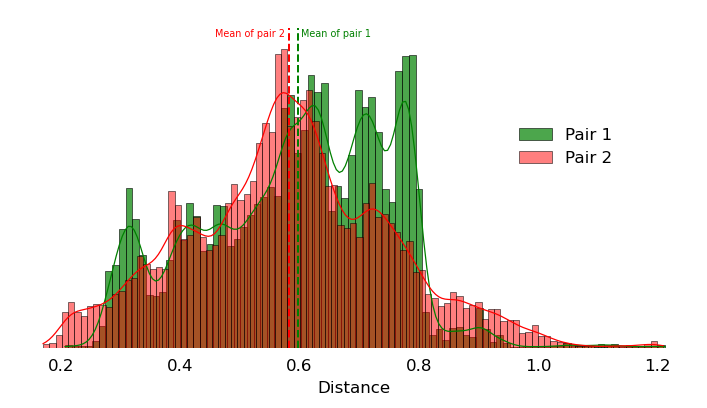

In [96]:
import seaborn as sns

def FreedmanDiaconis_bins(x):
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
    fd_bins = round((x.max() - x.min()) / bin_width)
    return fd_bins

fig, ax = plt.subplots(figsize=(6, 3.5), dpi=120, tight_layout=True)
plt.gca().spines[:].set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False)

color = "g"
sns.histplot(dis_free1, ax=ax, kde=True, color=color, discrete=False, label="Pair 1", alpha=0.7, line_kws={"linewidth":0.75})
ax.vlines(x=np.mean(dis_free1), ymin=0, ymax=2880, colors= color, linestyles="dashed", linewidth=1.2)
ax.annotate("Mean of pair 1",  xy=(np.mean(dis_free1)+0.005, 2800), fontsize="xx-small", color=color)

color = "r"
sns.histplot(dis_free2, ax=ax, kde=True, color=color, discrete=False, label="Pair 2", alpha=0.5, line_kws={"linewidth":0.75})
ax.vlines(x=np.mean(dis_free2), ymin=0, ymax=2880, colors= color, linestyles="dashed", linewidth=1.2)
ax.annotate("Mean of pair 2",  xy=(np.mean(dis_free2)-0.125, 2800), fontsize="xx-small", color=color)

plt.legend(fontsize="medium", bbox_to_anchor=[0.9, 0.7], frameon=False, fancybox=False)
ax.set_xlabel("Distance")
ax.set_ylabel("")
ax.set_yticklabels([])
plt.show()

In [18]:
print(f"{(0.596799-0.582795)/0.582795*100}% difference")

2.4029032507142336% difference


In [19]:
print("Pair 1 stats:\n", pd.DataFrame(dis_free1).describe(), "\n")
print("Pair 2 stats:\n", pd.DataFrame(dis_free2).describe(), "\n")
print("Corr bw 2 pairs\n", np.corrcoef(dis_free1, dis_free2[:dis_free1.shape[0]]))

Pair 1 stats:
                   0
count  71056.000000
mean       0.596799
std        0.155643
min        0.206288
25%        0.482410
50%        0.615037
75%        0.717851
max        1.212996 

Pair 2 stats:
                   0
count  73741.000000
mean       0.582795
std        0.171331
min        0.169512
25%        0.471489
50%        0.579518
75%        0.693360
max        1.210084 

Corr bw 2 pairs
 [[ 1.         -0.17157891]
 [-0.17157891  1.        ]]


In [ ]:
plt.figure(figsize=(25, 8))
dif = dis_free1 - dis_free2[:dis_free1.shape[0]]
x_axis = np.arange(0, len(dis_free1)/100, 0.01)/60

plt.plot(x_axis, dif, 'b', label="Diffence")
plt.plot(x_axis, np.full(len(x_axis), np.mean(dif)), 'b--', label="Mean difference")
plt.title("Difference in distance between mother & infant in normal condition")
plt.xlabel("Time (minutes)")
plt.ylabel("Distance (euclidean)")
plt.legend()
plt.show()

Even though the distance lines of 2 pairs are completely uncorrelated, they have quite similar mean value.

### When doing some task

In [ ]:
plt.figure(figsize=(25,8))

# Pair 1
babyHeadPosition_df_task1 = raw_df_task1.loc[:, "RigidBody_BabyHead_Position_X": "RigidBody_BabyHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
motherHeadPosition_df_task1 = raw_df_task1.loc[:, "RigidBody_MotherHead_Position_X": "RigidBody_MotherHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
dis_task1 = np.linalg.norm((babyHeadPosition_df_task1 - motherHeadPosition_df_task1).to_numpy(), axis=1)
x_axis1 = np.arange(0, len(dis_task1)/100, 0.01)/60
plt.plot(x_axis1, dis_task1, 'r-', label="Pair 1")
plt.plot(x_axis1, np.full(len(x_axis1), np.mean(dis_task1)), 'r--', label="Average pair 1")

# Pair 2
babyHeadPosition_df_task2 = raw_df_task2.loc[:, "RigidBody_BabyHead_Position_X": "RigidBody_BabyHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
motherHeadPosition_df_task2 = raw_df_task2.loc[:, "RigidBody_MotherHead_Position_X": "RigidBody_MotherHead_Position_Z"].set_axis(['x', 'y', 'z'], axis='columns', inplace=False)
dis_task2 = np.linalg.norm((babyHeadPosition_df_task2 - motherHeadPosition_df_task2).to_numpy(), axis=1)
x_axis2 = np.arange(0, len(dis_task2)/100, 0.01)/60
plt.plot(x_axis2, dis_task2, 'b-', label="Pair 2")
plt.plot(x_axis2, np.full(len(x_axis2), np.mean(dis_task2)), 'b:', label="Average pair 2")

plt.title("Distance between mother & infant when doing some tasks")
plt.xlabel("Time (minutes)")
plt.ylabel("Distance (euclidean)")
plt.legend()
plt.show()

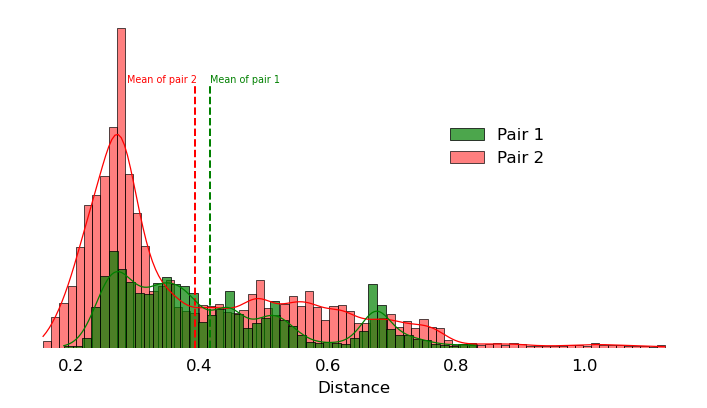

In [91]:
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=120, tight_layout=True)
plt.gca().spines[:].set_visible(False)
plt.tick_params(top=False, bottom=False, left=False, right=False)

color = "r"
sns.histplot(dis_task2, ax=ax, kde=True, color=color, discrete=False, label="Pair 2", alpha=0.5, line_kws={"linewidth":0.75})
ax.vlines(x=np.mean(dis_task2), ymin=0, ymax=4800, colors= color, linestyles="dashed", linewidth=1.2)
ax.annotate("Mean of pair 2",  xy=(np.mean(dis_task2)-0.105, 4850),  fontsize="xx-small", color=color)

color = "g"
sns.histplot(dis_task1, ax=ax, kde=True, color=color, discrete=False, label="Pair 1", alpha=0.7, line_kws={"linewidth":0.75})
ax.vlines(x=np.mean(dis_task1), ymin=0, ymax=4800, colors=color, linestyles="dashed", linewidth=1.2)
ax.annotate("Mean of pair 1",  xy=(np.mean(dis_task1), 4850), fontsize="xx-small", color=color)

plt.legend(*map(reversed, ax.get_legend_handles_labels()), fontsize="medium", bbox_to_anchor=[0.8, 0.7], frameon=False, fancybox=False)
ax.set_xlabel("Distance")
ax.set_ylabel("")
ax.set_yticklabels([])
plt.show()

In [23]:
print(f"{(0.416571 - 0.392280)/0.392280*100}% difference")

6.192260630162131% difference


In the case, we can see mother-infant of pair 2 is much closer compare to pair 1.

In [24]:
print("Pair 1 stats:\n", pd.DataFrame(dis_task1).describe(), "\n")
print("Pair 2 stats:\n", pd.DataFrame(dis_task2).describe(), "\n")
#print("Corr bw 2 pairs\n", np.corrcoef(dis_task1[:dis_task2.shape[0]], dis_task2)) # may not so meaningful since the the length difference is x2

Pair 1 stats:
                   0
count  25496.000000
mean       0.416571
std        0.146543
min        0.188531
25%        0.295816
50%        0.376524
75%        0.505528
max        0.830317 

Pair 2 stats:
                   0
count  57310.000000
mean       0.392280
std        0.178437
min        0.156279
25%        0.262484
50%        0.309852
75%        0.508947
max        1.125100 

